In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from subprocess import STDOUT
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

XcalManProcess = pd.read_csv('ChemicalManufacturingProcess.csv')

In [4]:
#print(XcalManProcess)
XcalManProcess.head(5)

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1


In [5]:
#xcal = XcalManProcess.columns.get_values()
#xcalMP = xcal.tolist()
#feature_cols = xcalMP[1:]
X = XcalManProcess.iloc[0:,1:]
y = XcalManProcess.iloc[0:,0]

#feature_cols = XcalManProcess.loc['BiologicalMaterial01', 'BiologicalMaterial02', 'BiologicalMaterial03', 'BiologicalMaterial04', 'BiologicalMaterial05', 'BiologicalMaterial06', 'BiologicalMaterial07', 'BiologicalMaterial08', 'BiologicalMaterial09', 'BiologicalMaterial10', 'BiologicalMaterial11', 'BiologicalMaterial12', 'ManufacturingProcess01', 'ManufacturingProcess02', 'ManufacturingProcess03', 'ManufacturingProcess04', 'ManufacturingProcess05', 'ManufacturingProcess06', 'ManufacturingProcess07', 'ManufacturingProcess08', 'ManufacturingProcess09', 'ManufacturingProcess10', 'ManufacturingProcess11', 'ManufacturingProcess12', 'ManufacturingProcess13', 'ManufacturingProcess14', 'ManufacturingProcess15', 'ManufacturingProcess16', 'ManufacturingProcess17', 'ManufacturingProcess18', 'ManufacturingProcess19', 'ManufacturingProcess20', 'ManufacturingProcess21', 'ManufacturingProcess22', 'ManufacturingProcess23', 'ManufacturingProcess24', 'ManufacturingProcess25', 'ManufacturingProcess26', 'ManufacturingProcess27', 'ManufacturingProcess28', 'ManufacturingProcess29', 'ManufacturingProcess30', 'ManufacturingProcess31', 'ManufacturingProcess32', 'ManufacturingProcess33', 'ManufacturingProcess34', 'ManufacturingProcess35', 'ManufacturingProcess36', 'ManufacturingProcess37', 'ManufacturingProcess38', 'ManufacturingProcess39', 'ManufacturingProcess40', 'ManufacturingProcess41', 'ManufacturingProcess42', 'ManufacturingProcess43', 'ManufacturingProcess44', 'ManufacturingProcess45']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(132, 57)
(44, 57)
(132,)
(44,)


In [7]:
pls = PLSRegression(n_components=10)
# Fit data


X = X_train.fillna(X_train.mean())
X_test.fillna(X_test.mean())
y = y_train.fillna(y_train.mean())
y_test.fillna(y_test.mean())
pls.fit(X,y)


#score = r2_score(y, y_cv)


PLSRegression(copy=True, max_iter=500, n_components=10, scale=True, tol=1e-06)

In [13]:
components = []
mean = []
std = []
tolerance = []


for i in np.arange(1, 11):
    pls = PLSRegression(n_components=i+1)
    y_cv = cross_val_predict(pls, X, y, cv=10)
    score = mean_squared_error(y, y_cv)
    components.append(i)
    means = score.mean()
    mean.append(means)
    stds= score.std()
    std.append(stds)

for i in mean:
    tol = round((i - mean[3])/mean[3],4)
    tolerance.append(tol)

list_of_tuples = list(zip(components, mean, std, tolerance))
df = pd.DataFrame(list_of_tuples, columns = ['components', 'mean', 'std', 'tolerance']) 
print ('Question 4B')
print(df)

Question 4B
   components       mean  std  tolerance
0           1  10.050360  0.0     0.8582
1           2   3.030844  0.0    -0.4396
2           3   1.410705  0.0    -0.7392
3           4   5.408797  0.0     0.0000
4           5   6.297896  0.0     0.1644
5           6   7.214899  0.0     0.3339
6           7   7.165960  0.0     0.3249
7           8   6.242274  0.0     0.1541
8           9   7.760117  0.0     0.4347
9          10  10.137049  0.0     0.8742


In [16]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    from subprocess import STDOUT

    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''

    mse = []
    components = []
    means = []
    std = []
    tolerance = []
    component = np.arange(1, n_comp)

    for i in component:
        pls = PLSRegression(n_components=i)

        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))

        comp = 100*(i+1)/40
        
        
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print ("Question 4A")
    print("Suggested number of components: ", msemin+1)
    #STDOUT.write("\n")
    components = []
    mean = []
    std = []
    tolerance = []


    for i in np.arange(1, 11):
        y_cv = cross_val_predict(pls, X, y, cv=10)
        score = mean_squared_error(y, y_cv)
        components.append(i)
        means = score.mean()
        mean.append(means)
        stds= score.std()
        std.append(stds)
    
    for i in mean:
        tol = round((i - mean[3])/mean[3],4)
        tolerance.append(tol)

    list_of_tuples = list(zip(components, mean, std, tolerance))
    df = pd.DataFrame(list_of_tuples, columns = ['components', 'mean', 'std', 'tolerance']) 
    print ('Question 4B')
    print(df)
    
        
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)

        plt.show()

    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)

    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)

    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)

    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')

        plt.show()

    return 

Question 4A
Suggested number of components:  4
Question 4B
   components      mean  std  tolerance
0           1  6.242274  0.0        0.0
1           2  6.242274  0.0        0.0
2           3  6.242274  0.0        0.0
3           4  6.242274  0.0        0.0
4           5  6.242274  0.0        0.0
5           6  6.242274  0.0        0.0
6           7  6.242274  0.0        0.0
7           8  6.242274  0.0        0.0
8           9  6.242274  0.0        0.0
9          10  6.242274  0.0        0.0


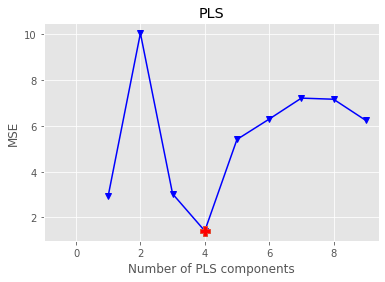

R2 calib: 0.728
R2 CV: 0.560
MSE calib: 0.874
MSE CV: 1.411


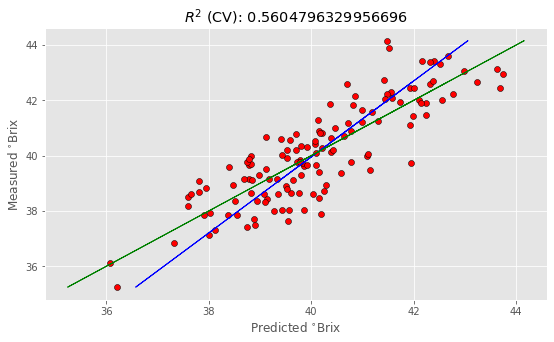

In [17]:
optimise_pls_cv(X,y, 10, plot_components=True)

## Question C
The random forest has the highest value of R square. The R square value for the SVM is relatively close to that of the random forest, with some overlap. Thus, the best models in terms of optimal R^2 values are random forest and support vector machine. Thus, it is subjective in nature

## Question D

Base on model’s prediction time, model complexity, and R squred  estimates the SVM should be chosen since it is fairly fast and its R squre is relatively close to the best R square. However, this decision is subjective, the PLS and regression tree models could also be considered if the predictive function is needed to be recorded, although they give substantial low R dquare value.